In [ ]:
import pandas as pd

# Assuming your dataset is in a CSV file named 'your_dataset.csv'
# Replace 'your_dataset.csv' with the actual path to your dataset file
try:
    MSIR = pd.read_csv('/content/sample_data/mnist_train_small.csv')
    # Display important information about the dataset
    print("\nImportant information about the dataset:")
    display(MSIR.info())

except FileNotFoundError:
    print("Error: 'your_dataset.csv' not found. Please make sure the dataset file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")


Important information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


None

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X = MSIR.iloc[:, 1:]
y = MSIR.iloc[:, 0]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15999, 784)
Shape of X_test: (4000, 784)
Shape of y_train: (15999,)
Shape of y_test: (4000,)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print("Maximum value of X_train:", X_train.max().max())
print("Maximum value of X_test:", X_test.max().max())

Maximum value of X_train: 1.0
Maximum value of X_test: 1.0


## Define the mlp model
[link text](https://)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Instantiate a Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))

# Add a hidden layer with Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# Add another hidden layer
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test loss and test accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7864 - loss: 0.6792 - val_accuracy: 0.9247 - val_loss: 0.2430
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9559 - loss: 0.1500 - val_accuracy: 0.9459 - val_loss: 0.1857
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9653 - loss: 0.1065 - val_accuracy: 0.9584 - val_loss: 0.1503
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9777 - loss: 0.0693 - val_accuracy: 0.9444 - val_loss: 0.2120
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9833 - loss: 0.0533 - val_accuracy: 0.9572 - val_loss: 0.2171
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9847 - loss: 0.0446 - val_accuracy: 0.9553 - val_loss: 0.1854
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9865 - loss: 0.0399 - val_accuracy: 0.9628 - val_loss: 0.1621
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9878 - loss: 0.0384 - val_accuracy

## Visualize training history


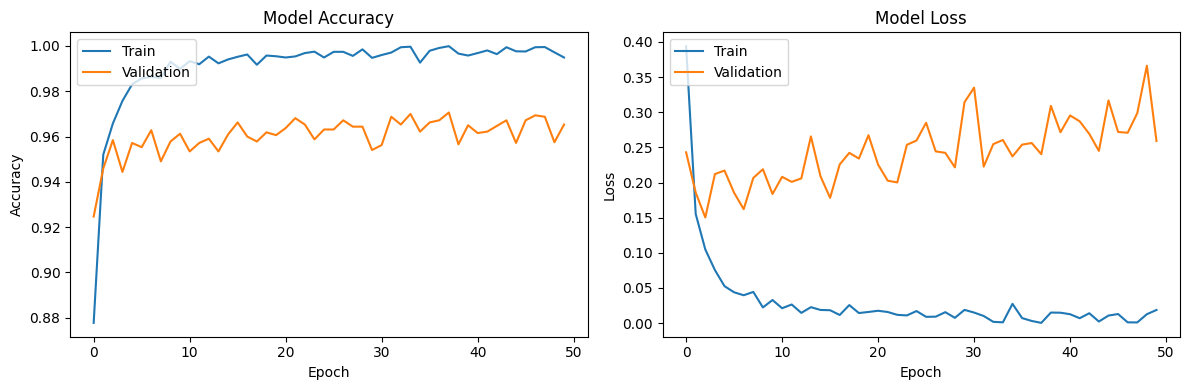

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()